# Importing Libraries

Importing necessary libraries for image processing, data handling, and model building.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model


# Setting Paths

Setting the paths to the training and test data directories.

In [17]:
trainpath = 'dataset/train'
testpath = 'dataset/test'

# Image Processing - Training Data

Loading and preprocessing training images from the specified directory, including resizing and label encoding.

In [3]:
new_size = 224
train_images = []
train_labels = []
class_disease = {'BacterialBlight': 0, 'Blast': 1, 'BrownSpot': 2, 'Tungro':3}

for i in os.listdir(trainpath):  # Entering train folder
    if i in class_disease:
      print("Entering to the folder name:", i)
      files = gb.glob(pathname=str(trainpath + '/' + i + '/*.jpg')) + gb.glob(pathname=str(trainpath + '/' + i + '/*.JPG'))   # Pointing to all the .jpg extension image folder
      print("Number of images in the folder is", len(files))

      for j in files:  # Reading each image
        image_raw = cv2.imread(j)
        image = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)
        resize_image = cv2.resize(image, (new_size, new_size))
        train_images.append(list(resize_image))
        train_labels.append(class_disease[i])


Entering to the folder name: BrownSpot
Number of images in the folder is 1400
Entering to the folder name: Blast
Number of images in the folder is 1240
Entering to the folder name: BacterialBlight
Number of images in the folder is 1384
Entering to the folder name: Tungro
Number of images in the folder is 1108


# Visualizing Training Data

Displaying a sample of training images with labels.

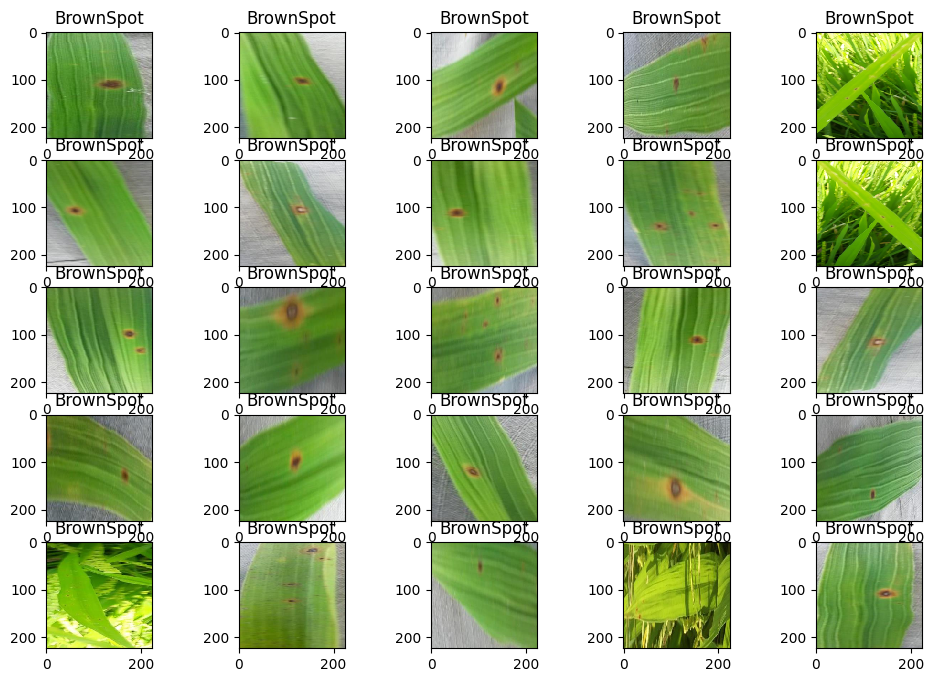

In [4]:
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 5

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('BacterialBlight')
    elif train_labels[i] == 1:
        ax.title.set_text('Blast')
    elif train_labels[i] == 2:
        ax.title.set_text('BrownSpot')
    elif train_labels[i] == 3:
        ax.title.set_text('Tungro')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()


# Image Processing - Test Data

Loading and preprocessing test images from the specified directory, including resizing and label encoding.

In [5]:
new_size = 224
test_images = []
test_labels = []

for i in os.listdir(testpath):  # Entering the test folder
  if i in class_disease:
    print("Entering to the folder name:", i)
    files = gb.glob(pathname=str(testpath + '/' + i + '/*.jpg')) +  gb.glob(pathname=str(testpath + '/' + i + '/*.JPG')) # Pointing to all the .jpg extension image folder
    print("Number of images in the folder is", len(files))
    for j in files:
        image_raw = cv2.imread(j)
        image = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)
        resize_image = cv2.resize(image, (new_size, new_size))
        test_images.append(list(resize_image))
        test_labels.append(class_disease[i])


Entering to the folder name: BrownSpot
Number of images in the folder is 200
Entering to the folder name: Blast
Number of images in the folder is 200
Entering to the folder name: BacterialBlight
Number of images in the folder is 200
Entering to the folder name: Tungro
Number of images in the folder is 200


# Visualizing Test Data

Displaying a sample of test images with labels.

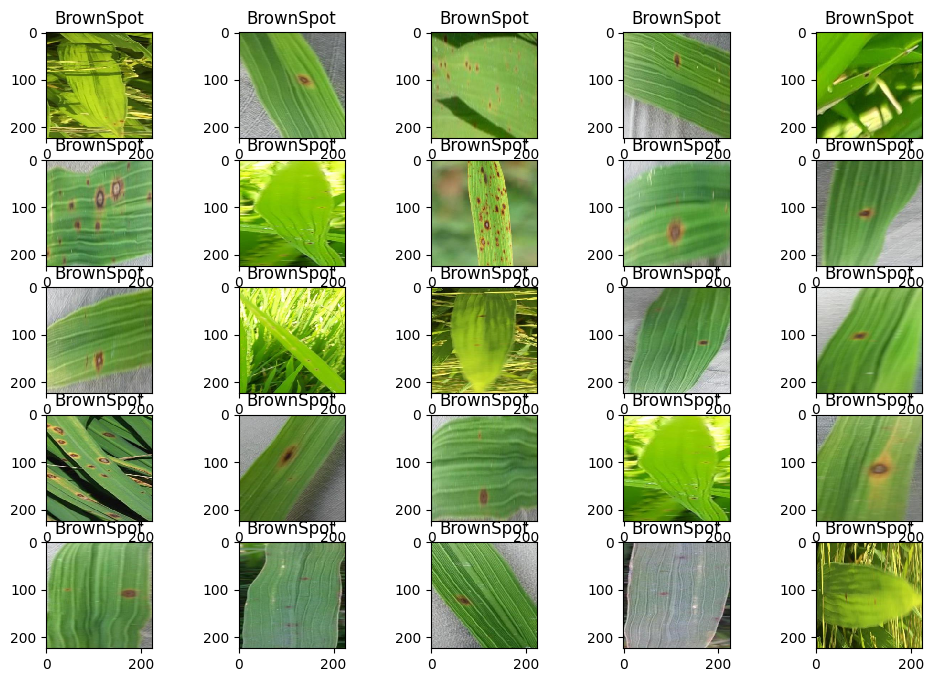

In [6]:
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 5

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('BacterialBlight')
    elif test_labels[i] == 1:
        ax.title.set_text('Blast')
    elif test_labels[i] == 2:
        ax.title.set_text('BrownSpot')
    elif test_labels[i] == 3:
        ax.title.set_text('Tungro')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

# Converting Lists to Arrays

Converting image and label lists to numpy arrays for use in model training.

In [7]:
def list_to_array_train(train_images, train_labels):
    return np.array(train_images), np.array(train_labels)

X_train, y_train = list_to_array_train(train_images, train_labels)

def list_to_array_test(test_images, test_labels):
    return np.array(test_images), np.array(test_labels)

X_test, y_test = list_to_array_test(test_images, test_labels)

print(X_train.shape)
print("*" * 20)
print(y_train.shape)
print("*" * 20)
print(X_test.shape)
print(y_test.shape)

(5132, 224, 224, 3)
********************
(5132,)
********************
(800, 224, 224, 3)
(800,)


# One-Hot Encoding

One-hot encoding the labels for compatibility with the neural network.

In [8]:
def keras_to_categorical(y_train, y_test):
    return to_categorical(y_train), to_categorical(y_test)

y_train1 = y_train
y_test1 = y_test
y_train, y_test = keras_to_categorical(y_train, y_test)

y_train1.shape, y_test1.shape

((5132,), (800,))

# VGG16 Model

Defining, compiling, and training a VGG16 model for classification.

In [20]:
with tf.device('/GPU:0'):
  def model_vgg16():
      VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
      for layer in VGG_model.layers:
          layer.trainable = False
      feature = GlobalAveragePooling2D()(VGG_model.output)
      d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
      d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
      output = Model(inputs=VGG_model.input, outputs=d2)
      return output

  model16 = model_vgg16()
  model16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
  history = model16.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
1027/1027 [==============================] - 42s 40ms/step - loss: 0.3032 - accuracy: 0.9256 - val_loss: 0.0936 - val_accuracy: 0.9588
Epoch 2/10
1027/1027 [==============================] - 45s 44ms/step - loss: 0.0367 - accuracy: 0.9897 - val_loss: 0.0588 - val_accuracy: 0.9787
Epoch 3/10
1027/1027 [==============================] - 40s 39ms/step - loss: 0.0323 - accuracy: 0.9912 - val_loss: 0.1205 - val_accuracy: 0.9725
Epoch 4/10
1027/1027 [==============================] - 40s 39ms/step - loss: 0.0740 - accuracy: 0.9821 - val_loss: 0.0083 - val_accuracy: 0.9987
Epoch 5/10
1027/1027 [==============================] - 40s 39ms/step - loss: 2.9329e-04 - accuracy: 1.0000 - val_loss: 6.0904e-04 - val_accuracy: 1.0000
Epoch 6/10
1027/1027 [==============================] - 45s 44ms/step - loss: 7.8696e-05 - accuracy: 1.0000 - val_loss: 5.5042e-04 - val_accuracy: 1.0000
Epoch 7/10
1027/1027 [==============================] - 40s 39ms/step - loss: 5.0717e-05 - accuracy: 1.0000 

# VGG19 Model

Defining, compiling, and training a VGG19 model for binary classification.

In [21]:
with tf.device('/GPU:0'):
  def model_vgg19():
      VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
      for layer in VGG19_model.layers:
          layer.trainable = False
      feature = keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
      d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
      d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
      output = Model(inputs=VGG19_model.input, outputs=d2)
      return output

  model19 = model_vgg19()
  model19.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
  history = model19.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

80134624/80134624 [==============================] - 5s 0us/step
Epoch 1/10
1027/1027 [==============================] - 55s 52ms/step - loss: 0.2520 - accuracy: 0.9365 - val_loss: 0.0531 - val_accuracy: 0.9862
Epoch 2/10
1027/1027 [==============================] - 49s 47ms/step - loss: 0.0550 - accuracy: 0.9850 - val_loss: 0.0587 - val_accuracy: 0.9837
Epoch 3/10
1027/1027 [==============================] - 49s 48ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9975
Epoch 4/10
1027/1027 [==============================] - 49s 48ms/step - loss: 0.0820 - accuracy: 0.9784 - val_loss: 0.1008 - val_accuracy: 0.9812
Epoch 5/10
1027/1027 [==============================] - 53s 51ms/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch 6/10
1027/1027 [==============================] - 49s 48ms/step - loss: 0.0449 - accuracy: 0.9906 - val_loss: 0.5946 - val_accuracy: 0.9463
Epoch 7/10
1027/1027 [==============================] - 48s

# Feature Extraction and Random Forest Classifier - VGG16

Using VGG16 to extract features from images and training a Random Forest classifier on these features.

In [23]:
with tf.device('/GPU:0'):
  def model_vgg16():
      VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
      for layer in VGG_model.layers:
          layer.trainable = False
      feature = keras.layers.GlobalAveragePooling2D()(VGG_model.output)
      output = Model(inputs=VGG_model.input, outputs=feature)
      return output

  model_FE_16 = model_vgg16()
  model_FE_16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
  train_feature_16 = model_FE_16.predict(X_train)
  test_feature_16 = model_FE_16.predict(X_test)

  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier()
  rf = rf.fit(train_feature_16, y_train)
  train_pred = rf.predict(train_feature_16)
  test_pred = rf.predict(test_feature_16)
  print("Train Accuracy Score", accuracy_score(train_pred, y_train))
  print("Test Accuracy Score", accuracy_score(test_pred, y_test))

25/25 [==============================] - 3s 131ms/step
Train Accuracy Score 1.0
Test Accuracy Score 0.9575


# Feature Extraction and Random Forest Classifier - VGG19

Using VGG19 to extract features from images and training a Random Forest classifier on these features.

In [24]:
with tf.device('/GPU:0'):
  def model_vgg19():
      VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
      for layer in VGG_model.layers:
          layer.trainable = False
      feature = keras.layers.GlobalAveragePooling2D()(VGG_model.output)
      output = Model(inputs=VGG_model.input, outputs=feature)
      return output

  model_FE_19 = model_vgg19()
  model_FE_19.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
  train_feature_19 = model_FE_19.predict(X_train)
  test_feature_19 = model_FE_19.predict(X_test)

  rf = RandomForestClassifier()
  rf = rf.fit(train_feature_19, y_train)
  train_pred = rf.predict(train_feature_19)
  test_pred = rf.predict(test_feature_19)
  print("Train Accuracy Score", accuracy_score(train_pred, y_train))
  print("Test Accuracy Score", accuracy_score(test_pred, y_test))

25/25 [==============================] - 4s 156ms/step
Train Accuracy Score 1.0
Test Accuracy Score 0.9625


# Combined Features and Random Forest Classifier

Combining VGG16 and VGG19 features to train Random Forest classifier and evaluate its performance.

In [25]:
final_train = np.hstack((train_feature_16, train_feature_19))
final_test = np.hstack((test_feature_16, test_feature_19))

rf = RandomForestClassifier()
rf = rf.fit(final_train, y_train)
train_pred = rf.predict(final_train)
test_pred = rf.predict(final_test)
print("Train Accuracy Score", accuracy_score(train_pred, y_train))
print("Test Accuracy Score", accuracy_score(test_pred, y_test))



Train Accuracy Score 1.0
Test Accuracy Score 0.96375


# Combined Features and Decision Tree Classifier

Using the combined VGG16 and VGG19 features to train decision tree classifier and evaluate its performance.

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(final_train, y_train)
train_pred = dtc.predict(final_train)
test_pred = dtc.predict(final_test)
print("Train Accuracy Score", accuracy_score(train_pred, y_train))
print("Test Accuracy Score", accuracy_score(test_pred, y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.9275


# ResNet50 Model

Defining, compiling, and training a ResNet50 model for classification.

In [27]:
with tf.device('/GPU:0'):
  from tensorflow.keras.applications import ResNet50

  def model_resnet50():
      base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
      for layer in base_model.layers:
          layer.trainable = False

      x = GlobalAveragePooling2D()(base_model.output)
      x = Dense(256, activation='relu')(x)
      outputs = Dense(4, activation='softmax')(x)

      model = Model(inputs=base_model.input, outputs=outputs)
      return model

  model_resnet = model_resnet50()

  model_resnet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')

  history_resnet = model_resnet.fit(
      X_train, y_train,
      validation_split=0.2,
      epochs=10,
      batch_size=5,
      verbose=1,
      validation_data=(X_test, y_test)
  )

94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/10
1027/1027 [==============================] - 34s 28ms/step - loss: 0.1505 - accuracy: 0.9534 - val_loss: 0.0171 - val_accuracy: 0.9950
Epoch 2/10
1027/1027 [==============================] - 25s 24ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/10
1027/1027 [==============================] - 27s 26ms/step - loss: 2.7209e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
1027/1027 [==============================] - 25s 25ms/step - loss: 1.4861e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/10
1027/1027 [==============================] - 27s 26ms/step - loss: 8.6708e-05 - accuracy: 1.0000 - val_loss: 6.0764e-04 - val_accuracy: 1.0000
Epoch 6/10
1027/1027 [==============================] - 27s 26ms/step - loss: 5.0007e-05 - accuracy: 1.0000 - val_loss: 4.3541e-04 - val_accuracy: 1.0000
Epoch 7/10
1027/1027 [=============

# Feature Extraction and SVM Classifier - ResNet50

Using ResNet50 to extract features from images and training a SVM classifier on these features.

In [32]:
from sklearn.svm import SVC

with tf.device('/GPU:0'):
    # Define ResNet50 model
    def model_resnet50():
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        for layer in base_model.layers:
            layer.trainable = False
        feature = GlobalAveragePooling2D()(base_model.output)
        output = Model(inputs=base_model.input, outputs=feature)
        return output

    # Create ResNet50 model and compile
    model_resnet = model_resnet50()
    model_resnet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')

    # Extract features from ResNet50 model
    train_features_resnet = model_resnet.predict(X_train)
    test_features_resnet = model_resnet.predict(X_test)

    # Flatten the feature vectors
    train_features_flatten_resnet = train_features_resnet.reshape(train_features_resnet.shape[0], -1)
    test_features_flatten_resnet = test_features_resnet.reshape(test_features_resnet.shape[0], -1)

    # Convert one-hot encoded labels to class labels
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(train_features_flatten_resnet, y_train_labels)

    # Predict on training and test data
    train_predictions = svm_classifier.predict(train_features_flatten_resnet)
    test_predictions = svm_classifier.predict(test_features_flatten_resnet)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_labels, train_predictions)
    test_accuracy = accuracy_score(y_test_labels, test_predictions)

    print("Train Accuracy Score (ResNet50 + SVM):", train_accuracy)
    print("Test Accuracy Score (ResNet50 + SVM):", test_accuracy)


25/25 [==============================] - 2s 96ms/step
Train Accuracy Score (ResNet50 + SVM): 1.0
Test Accuracy Score (ResNet50 + SVM): 1.0
